# **Spotify Data Analysis**

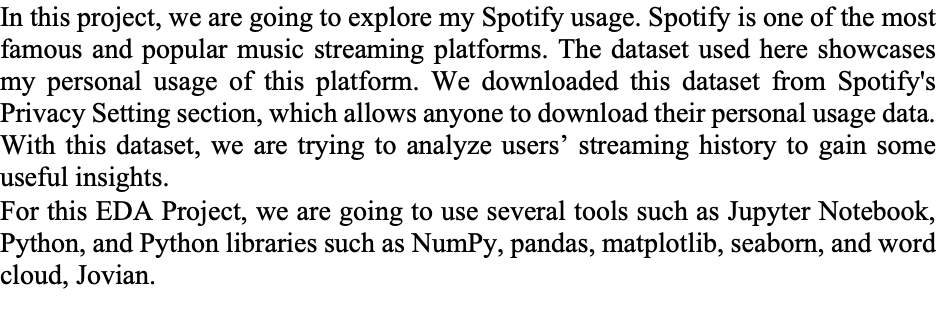

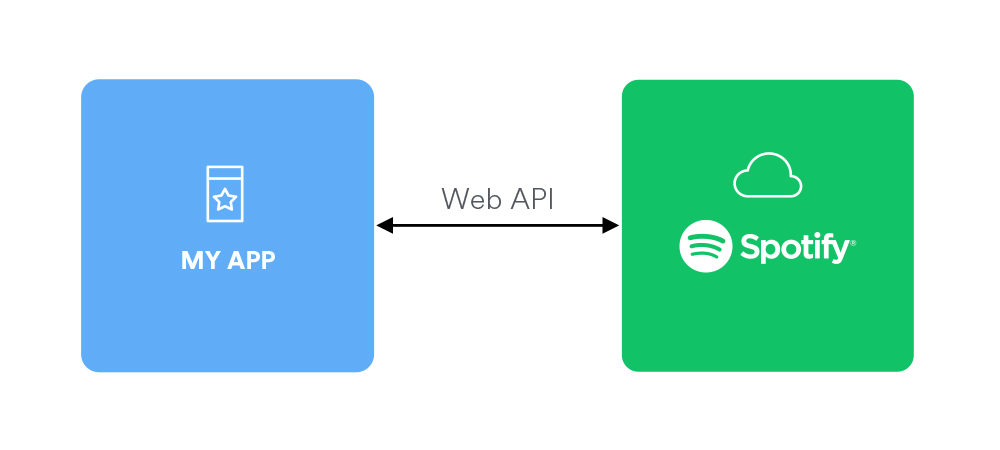

# **Part A: Playlist Analysis**

In [ ]:
pip install spotipy #install spotipy library

     |████████████████████████████████| 138 kB 11.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

In [ ]:
#Use spotipy API credentials to fetch Playlist data from Spotify
client_id = 'f1183bb7881247f9bbb486f30468c7d9'
client_secret = '4b00e7d46bbd41c4adaacd584eab1bda'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
#function to iterate through the playlist

def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids = getTrackIDs('Jay', '6dLvqHcFjpO261yPhAqZpP')

In [ ]:
print(len(ids))
#print(ids)

100


In [ ]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']
  #genre = meta['album']['genre']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  

  track = [name, album, artist, release_date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
  return track

In [ ]:
# loop over track ids 
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

# create dataset
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.to_csv("spotify.csv", sep = ',')

In [ ]:
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,"Darkhaast (feat. Arijit Singh, Sunidhi Chauhan)",Shivaay,Mithoon,2016-10-07,374205,63,0.523,0.813,0.557,0.000581,0.0958,-7.799,0.0293,111.766,4
1,Ve Maahi,Kesari,Various Artists,2019-03-18,223999,63,0.650,0.405,0.551,0.000000,0.2190,-6.906,0.0274,102.934,4
2,"Sapna Jahan (From ""Brothers"")","Sapna Jahan (From ""Brothers"")",Ajay-Atul,2015-07-24,341780,58,0.471,0.780,0.329,0.002100,0.1170,-11.958,0.0312,126.107,4
3,Namo Namo,Kedarnath,Amit Trivedi,2018-11-27,322250,67,0.648,0.436,0.711,0.000000,0.1210,-6.216,0.0304,119.935,4
4,Sweetheart,Kedarnath,Amit Trivedi,2018-11-27,212195,62,0.768,0.376,0.806,0.000002,0.0787,-6.277,0.0517,123.039,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Abhi Kuch Dino Se,Dil Toh Baccha Hai Ji,Pritam,2010-12-23,285686,59,0.703,0.654,0.695,0.000000,0.1030,-5.518,0.1180,92.003,4
96,Baatein Karo,Baatein Karo,Vayu,2020-03-04,195309,52,0.760,0.850,0.551,0.000713,0.1540,-7.273,0.0273,106.046,3
97,Kahin Toh Hogi Woh-Teri Aahatein,T-Series Mixtape Season 2,Various Artists,2019-06-29,317222,39,0.516,0.442,0.480,0.000002,0.1390,-9.557,0.0274,86.982,4
98,Aahatein,Ek Main Aur Ekk Tu,Amit Trivedi,2011-12-29,267144,47,0.609,0.311,0.288,0.000145,0.1090,-13.371,0.0251,81.999,4


In [ ]:
df.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,261540.770000,55.010000,0.580180,0.565931,0.517000,0.001708,0.134091,-7.820340,0.044161,110.222150,3.840000
std,70351.031438,18.159504,0.148431,0.250152,0.159718,0.014045,0.078187,2.545769,0.027126,24.216756,0.581187
min,157245.000000,0.000000,0.236000,0.012800,0.124000,0.000000,0.035900,-16.191000,0.024600,71.742000,1.000000
25%,207640.500000,50.000000,0.480750,0.381750,0.414250,0.000000,0.091900,-9.020000,0.030475,90.052750,4.000000
50%,251520.000000,59.000000,0.598500,0.611000,0.510000,0.000000,0.113500,-7.609000,0.034200,108.976500,4.000000
75%,306463.000000,66.000000,0.700250,0.768250,0.632750,0.000036,0.139000,-6.076500,0.044000,123.968500,4.000000
max,616509.000000,85.000000,0.889000,0.983000,0.812000,0.140000,0.525000,-2.572000,0.175000,179.975000,5.000000


In [ ]:
df.drop("danceability",axis=1,inplace=True)

In [ ]:
# calculating the most popular song from our playlist
m_pop = df.loc[df['popularity'].idxmax()]


In [ ]:
print(m_pop)

# Believer by Imagine Dragons is the most popular song from our playlist

name                       Believer
album                        Evolve
artist              Imagine Dragons
release_date             2017-06-23
length                       204346
popularity                       85
danceability                  0.776
acousticness                 0.0622
energy                         0.78
instrumentalness                0.0
liveness                      0.081
loudness                     -4.374
speechiness                   0.128
tempo                       124.949
time_signature                    4
Name: 37, dtype: object


In [ ]:
# Determining the songs which had released before the year 2010

df[(df['release_date']<'2010-01-01')]

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
11,Jab Se Tere Naina,Saawariya (Original Motion Picture Soundtrack),Monty Sharma,2007-09-14,284573,60,0.599,0.362,0.653,0.000000,0.1440,-7.576,0.1220,79.968,4
12,Koi Tumsa Nahin,Krrish,Rajesh Roshan,2006-04-28,375346,46,0.663,0.170,0.762,0.000011,0.1070,-4.095,0.0326,140.022,4
43,Jashn-E-Bahaaraa,Jodhaa Akbar (Original Motion Picture Soundtrack),A.R. Rahman,2007-12-31,315173,67,0.700,0.767,0.343,0.000000,0.0789,-10.474,0.0308,137.864,4
49,Tune Jo Na Kaha,New York,Pritam,2009-06-10,310073,63,0.314,0.779,0.475,0.005390,0.3400,-12.380,0.0838,78.992,4
70,Jashn-E-Bahaaraa,Jodhaa Akbar (Original Motion Picture Soundtrack),A.R. Rahman,2007-12-31,315173,67,0.700,0.767,0.343,0.000000,0.0789,-10.474,0.0308,137.864,4
83,Dil Haara,Tashan,Vishal-Shekhar,2008-03-27,352000,46,0.466,0.382,0.778,0.000001,0.0359,-7.174,0.1150,99.981,4
87,Mann Ki Lagan,Paap (Original Motion Picture Soundtrack),Various Artists,2003-09-04,291920,36,0.641,0.452,0.483,0.001990,0.2690,-13.294,0.0386,147.873,4


In [ ]:
# Determining the audio features which are causing the songs to be least played.

new_df = df[(df['popularity']<50)]

# There are a total of 24 songs which are not at all popular in today's generation because of no instrument

In [ ]:
new_df[['name','album','artist','danceability','acousticness','energy','liveness','loudness']]

,name,album,artist,danceability,acousticness,energy,liveness,loudness
8,"Main Rahoon Ya Na Rahoon (From ""Main Rahoon Ya...",Hits Of Armaan Malik,Various Artists,0.549,0.716,0.488,0.1260,-8.059
12,Koi Tumsa Nahin,Krrish,Rajesh Roshan,0.663,0.170,0.762,0.1070,-4.095
25,Matkar Maya Ko Ahankar,Panchrang,Kabir Cafe,0.797,0.614,0.515,0.1380,-6.289
32,Tajdar-E-Haram,Coke Studio Season 8,Various Artists,0.436,0.237,0.554,0.1160,-6.635
34,Waalian,Waalian,Harnoor,0.705,0.416,0.412,0.1050,-9.203
35,Falling,Nicotine,Trevor Daniel,0.784,0.123,0.430,0.0887,-8.756
39,Moti Veraana (From Songs of Faith),Moti Veraana (From Songs of Faith),Amit Trivedi,0.710,0.269,0.783,0.0842,-6.739
40,Radha NE Shyam Mali Jashe,Radha NE Shyam Mali Jashe,Sachin-Jigar,0.663,0.711,0.595,0.3840,-6.412
42,"Mujhe Kaise, Pata Na Chala",TOP HITS 2019 By MEET BROS,Meet Bros.,0.291,0.758,0.404,0.0731,-7.406
53,Baari,Baari,Bilal Saeed,0.651,0.854,0.538,0.0999,-7.043


In [ ]:
# Determining the most played artist

pop_art = df['artist'].value_counts()

In [ ]:
pop_art.head(1)

# Our playlist usually contains songs from combined artists.

Various Artists    18
Name: artist, dtype: int64


# **Part B: Streaming History Analysis**


In [ ]:
%matplotlib inline
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib # Import for Matplotlib
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns # Import for Seaborn
from wordcloud import WordCloud # Import for Word Cloud

Download the Streaming History from Spotify App by following below steps listed steps: -

1. Go to the Privacy Settting Page of your Spotify Account.
2. Scroll to the bottom and you'll see a section called Download Your Data.
3. You'll see a three step process with instruction to download the data.
4. You have to to Request for your data the you'll get an confirmation email from Spotify to Confirm the request.
5. After collecting the required information, Spotify will create a Zip File and send you an email with the link to download it.
6. If you can't find the email, you can request again from your Privacy Settting Page.



In [ ]:
df1 = pd.read_json("/content/sample_data/StreamingHistory0.json") # Load the JSON File into a dataframe
df1.head()
df1

,endTime,artistName,trackName,msPlayed
0,2020-07-26 05:32,Fotty Seven,Chaud,192311
1,2020-07-27 07:34,DaBaby,ROCKSTAR (feat. Roddy Ricch),181733
2,2020-07-27 07:38,THE SCOTTS,THE SCOTTS,165977
3,2020-07-27 07:39,Logic,Perfect,100291
4,2020-07-27 07:43,Roddy Ricch,The Box,196652
...,...,...,...,...
9995,2021-04-23 13:58,24kGoldn,Mood (feat. iann dior),140533
9996,2021-04-23 14:01,24kGoldn,Mood (feat. iann dior),140533
9997,2021-04-23 14:03,24kGoldn,Mood (feat. iann dior),140533
9998,2021-04-23 14:06,24kGoldn,Mood (feat. iann dior),140533


In [ ]:
df2 = pd.read_json("/content/sample_data/StreamingHistory1.json")
df2

,endTime,artistName,trackName,msPlayed
0,2021-04-23 14:11,24kGoldn,Mood (feat. iann dior),140533
1,2021-04-23 14:16,24kGoldn,Mood (feat. iann dior),274676
2,2021-04-23 14:23,Mvndvr,Mind Reader,2441
3,2021-04-23 14:23,24kGoldn,Mood (feat. iann dior),128897
4,2021-04-23 14:23,Nathan Evans,Wellerman - Sea Shanty / 220 KID x Billen Ted ...,20313
...,...,...,...,...
799,2021-04-30 21:45,Nikhil D'Souza,People,188689
800,2021-04-30 21:49,Nikhil D'Souza,People,188689
801,2021-04-30 21:52,Nikhil D'Souza,People,188689
802,2021-04-30 21:56,Nikhil D'Souza,People,188689


### **Merging the Datasets**





In [ ]:
spotify_stream_df = pd.concat([df1,df2], ignore_index=True) # To concatenate the two dataframes

In [ ]:
spotify_stream_df

,endTime,artistName,trackName,msPlayed
0,2020-07-26 05:32,Fotty Seven,Chaud,192311
1,2020-07-27 07:34,DaBaby,ROCKSTAR (feat. Roddy Ricch),181733
2,2020-07-27 07:38,THE SCOTTS,THE SCOTTS,165977
3,2020-07-27 07:39,Logic,Perfect,100291
4,2020-07-27 07:43,Roddy Ricch,The Box,196652
...,...,...,...,...
10799,2021-04-30 21:45,Nikhil D'Souza,People,188689
10800,2021-04-30 21:49,Nikhil D'Souza,People,188689
10801,2021-04-30 21:52,Nikhil D'Souza,People,188689
10802,2021-04-30 21:56,Nikhil D'Souza,People,188689


In [ ]:
spotify_stream_df.shape #size of the data frame

(10804, 4)

In [ ]:
spotify_stream_df.info() # info method offers an quick option to check the data contained in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10804 entries, 0 to 10803
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     10804 non-null  object
 1   artistName  10804 non-null  object
 2   trackName   10804 non-null  object
 3   msPlayed    10804 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 337.8+ KB


In [ ]:
spotify_stream_df.nunique() # To see the unique elemetns present in each column

endTime       8024
artistName    2359
trackName     4068
msPlayed      7264
dtype: int64

In [ ]:
spotify_stream_df.sample(10)

,endTime,artistName,trackName,msPlayed
10344,2021-04-26 15:31,Sammy Brue,I Know,4788
8512,2021-04-09 16:34,Jon Bellion,Stupid Deep,10599
8472,2021-04-08 22:59,Addict.,Hold Me Closer,174006
8198,2021-04-03 08:22,polnalyubvi,Больше ничего,131933
2703,2020-10-14 20:27,When Chai Met Toast,Kahaani,136753
2488,2020-10-08 21:54,Twenty One Pilots,Level of Concern,220051
6810,2021-02-04 09:54,AP Dhillon,Saada Pyaar,34505
8821,2021-04-14 05:02,Pascal Letoublon,Friendships,242015
9284,2021-04-21 16:32,Foxing,Go Down Together,3242
9614,2021-04-21 23:08,Lauv,Feelings,99082


### **Cleaning and Formatting**


In [ ]:
spotify_stream_df["Play-Time"]= pd.to_datetime(spotify_stream_df["endTime"]) # To create a additional column

Here we used the to_datetime module to obatin the proper date time format and then we added that into a new column called Play-Time.

In [ ]:
spotify_stream_df['year'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).year
spotify_stream_df['month'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).month
spotify_stream_df['day'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).day
spotify_stream_df['weekday'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).weekday
spotify_stream_df['time'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).time
spotify_stream_df['hours'] = pd.DatetimeIndex(spotify_stream_df["Play-Time"]).hour
spotify_stream_df['day-name'] = spotify_stream_df["Play-Time"].apply(lambda x: x.day_name())
spotify_stream_df['Count'] = 1

In [ ]:
spotify_stream_df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(spotify_stream_df["msPlayed"], unit='ms')

In [ ]:
def hours(td):
    '''To get the hour information'''
    return td.seconds/3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

spotify_stream_df["Listening Time(Hours)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
spotify_stream_df["Listening Time(Minutes)"] = spotify_stream_df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)

In [ ]:
spotify_stream_df.head()

,endTime,artistName,trackName,msPlayed,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2020-07-26 05:32,Fotty Seven,Chaud,192311,2020-07-26 05:32:00,2020,7,26,6,05:32:00,5,Sunday,1,0 days 00:03:12.311000,0.053,3.200
1,2020-07-27 07:34,DaBaby,ROCKSTAR (feat. Roddy Ricch),181733,2020-07-27 07:34:00,2020,7,27,0,07:34:00,7,Monday,1,0 days 00:03:01.733000,0.050,3.017
2,2020-07-27 07:38,THE SCOTTS,THE SCOTTS,165977,2020-07-27 07:38:00,2020,7,27,0,07:38:00,7,Monday,1,0 days 00:02:45.977000,0.046,2.750
3,2020-07-27 07:39,Logic,Perfect,100291,2020-07-27 07:39:00,2020,7,27,0,07:39:00,7,Monday,1,0 days 00:01:40.291000,0.028,1.667
4,2020-07-27 07:43,Roddy Ricch,The Box,196652,2020-07-27 07:43:00,2020,7,27,0,07:43:00,7,Monday,1,0 days 00:03:16.652000,0.054,3.267


In [ ]:
spotify_stream_df

,endTime,artistName,trackName,msPlayed,Play-Time,year,month,day,weekday,time,hours,day-name,Count,Time-Played (hh-mm-ss),Listening Time(Hours),Listening Time(Minutes)
0,2020-07-26 05:32,Fotty Seven,Chaud,192311,2020-07-26 05:32:00,2020,7,26,6,05:32:00,5,Sunday,1,0 days 00:03:12.311000,0.053,3.200
1,2020-07-27 07:34,DaBaby,ROCKSTAR (feat. Roddy Ricch),181733,2020-07-27 07:34:00,2020,7,27,0,07:34:00,7,Monday,1,0 days 00:03:01.733000,0.050,3.017
2,2020-07-27 07:38,THE SCOTTS,THE SCOTTS,165977,2020-07-27 07:38:00,2020,7,27,0,07:38:00,7,Monday,1,0 days 00:02:45.977000,0.046,2.750
3,2020-07-27 07:39,Logic,Perfect,100291,2020-07-27 07:39:00,2020,7,27,0,07:39:00,7,Monday,1,0 days 00:01:40.291000,0.028,1.667
4,2020-07-27 07:43,Roddy Ricch,The Box,196652,2020-07-27 07:43:00,2020,7,27,0,07:43:00,7,Monday,1,0 days 00:03:16.652000,0.054,3.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2021-04-30 21:45,Nikhil D'Souza,People,188689,2021-04-30 21:45:00,2021,4,30,4,21:45:00,21,Friday,1,0 days 00:03:08.689000,0.052,3.133
10800,2021-04-30 21:49,Nikhil D'Souza,People,188689,2021-04-30 21:49:00,2021,4,30,4,21:49:00,21,Friday,1,0 days 00:03:08.689000,0.052,3.133
10801,2021-04-30 21:52,Nikhil D'Souza,People,188689,2021-04-30 21:52:00,2021,4,30,4,21:52:00,21,Friday,1,0 days 00:03:08.689000,0.052,3.133
10802,2021-04-30 21:56,Nikhil D'Souza,People,188689,2021-04-30 21:56:00,2021,4,30,4,21:56:00,21,Friday,1,0 days 00:03:08.689000,0.052,3.133


In [ ]:
spotify_stream_df.drop(columns=["endTime","Time-Played (hh-mm-ss)","msPlayed"], inplace=True)

In [ ]:
spotify_stream_df.describe() # Final check for any abnormality

,year,month,day,weekday,hours,Count,Listening Time(Hours),Listening Time(Minutes)
count,10804.000000,10804.000000,10804.000000,10804.000000,10804.000000,10804.0,10804.000000,10804.000000
mean,2020.561829,5.819326,16.268327,2.943817,13.245927,1.0,0.034158,2.049620
std,0.496185,3.755626,8.981046,1.960852,5.085855,0.0,0.028722,1.723019
min,2020.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2020.000000,2.000000,9.000000,1.000000,9.000000,1.0,0.004000,0.250000
50%,2021.000000,4.000000,16.000000,3.000000,13.000000,1.0,0.039000,2.333000
75%,2021.000000,9.000000,24.000000,4.000000,17.000000,1.0,0.056000,3.350000
max,2021.000000,12.000000,31.000000,6.000000,23.000000,1.0,0.388000,23.300000



### **Exploratory Analysis and Visualization**

In [ ]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
unique_artists = spotify_stream_df["artistName"].nunique() # Count number of unique artist in dataset
total_artists = spotify_stream_df["artistName"].count() # Count total artist in dataset
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage of the unique
print('Percentage of Unique Artist in the data frame is :-', unique_artist_percentage)

Percentage of Unique Artist in the data frame is :- 21.834505738615327


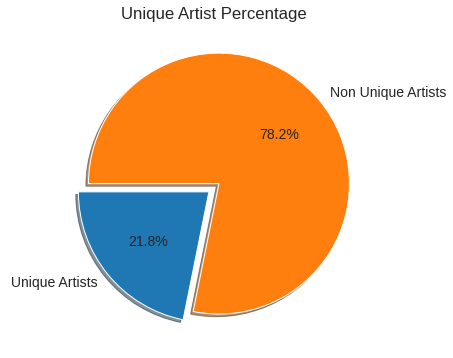

In [ ]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists]) # Make an array out of the results
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"] # Make a lable for them

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage");

In [ ]:
top_10_artist_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_df.head(15)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Lauv,11.053,666.443,329
Pritam,10.194,611.762,178
Billie Eilish,9.745,583.334,219
Jome,8.428,503.377,178
KR$NA,7.581,454.893,141
Tash Sultana,6.949,418.753,99
Harry Styles,6.795,405.402,149
Troye Sivan,6.528,389.699,152
Justin Bieber,5.726,342.826,113


In [ ]:
top_10_artist_time_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_artist_time_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Lauv,11.053,666.443,329
Pritam,10.194,611.762,178
Billie Eilish,9.745,583.334,219
Jome,8.428,503.377,178
KR$NA,7.581,454.893,141
Tash Sultana,6.949,418.753,99
Harry Styles,6.795,405.402,149
Troye Sivan,6.528,389.699,152
Justin Bieber,5.726,342.826,113


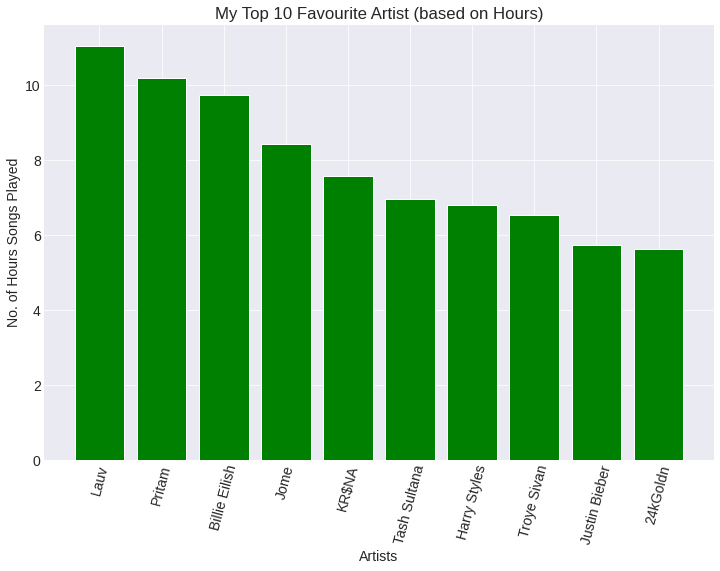

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=75);

In [ ]:
top_10_artist_count_df = spotify_stream_df.groupby(["artistName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_10_artist_count_df.head(10)

,Listening Time(Hours),Listening Time(Minutes),Count
artistName,,,
Lauv,11.053,666.443,329
Billie Eilish,9.745,583.334,219
Jome,8.428,503.377,178
Pritam,10.194,611.762,178
Troye Sivan,6.528,389.699,152
Harry Styles,6.795,405.402,149
24kGoldn,5.620,336.295,146
KR$NA,7.581,454.893,141
Jugraj Sandhu,3.762,225.785,122


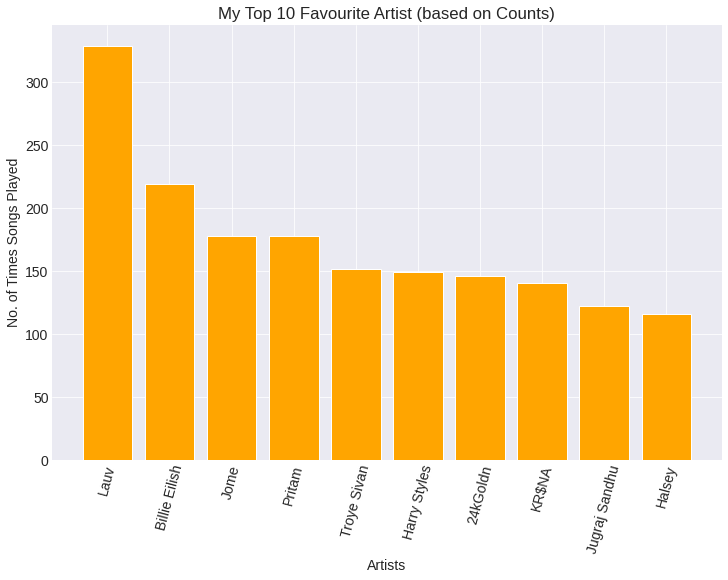

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='orange')
ax.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=75);

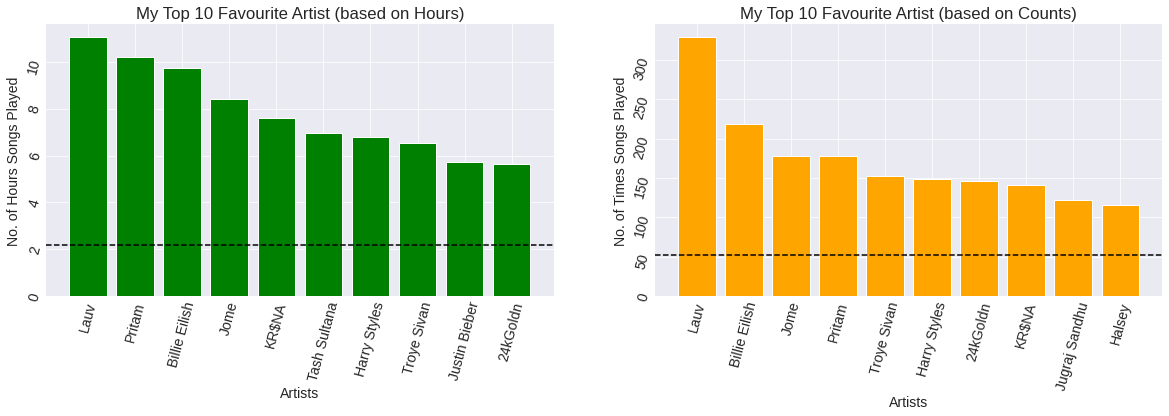

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_artist_time_df.head(10).index,top_10_artist_time_df["Listening Time(Hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75);
ax1.axhline(top_10_artist_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="black")

# Setting up our seecond graph
ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10), color="orange")
ax2.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=75);
ax2.axhline(top_10_artist_count_df["Count"][:100].mean(), linestyle="--", color="black");

### **Song Tracks (Exploration)**

what is the percentage of unique songs we have?

In [ ]:
unique_songs = spotify_stream_df["trackName"].nunique()
total_songs = spotify_stream_df["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

37.652721214365044

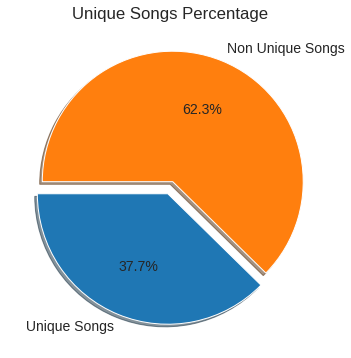

In [ ]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

In [ ]:
top_10_songs_time_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Listening Time(Minutes)",ascending=False)
top_10_songs_count_df = spotify_stream_df.groupby(["trackName"])[["Listening Time(Hours)","Listening Time(Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)

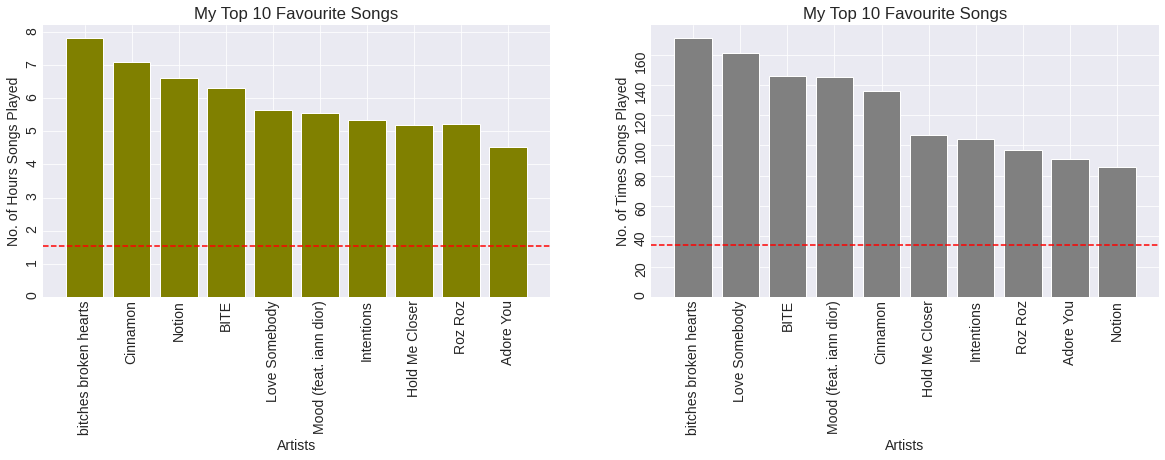

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["Listening Time(Hours)"].head(10), color="olive")
ax1.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_time_df["Listening Time(Hours)"][:100].mean(), linestyle="--", color="r")

# Setting up our second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="gray")
ax2.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

### **Day Wise Usage (Exploration)**

In [ ]:
spotify_stream_df["day-name"].value_counts()

Friday       2249
Monday       1643
Wednesday    1523
Tuesday      1481
Sunday       1324
Saturday     1293
Thursday     1291
Name: day-name, dtype: int64

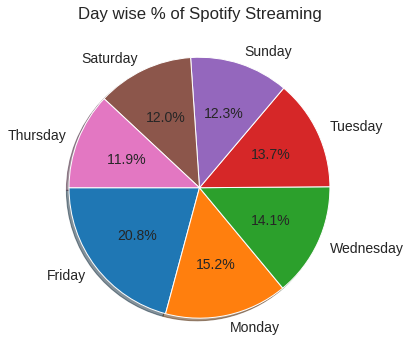

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(spotify_stream_df["day-name"].value_counts(), labels=spotify_stream_df["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True);
ax.set(title="Day wise % of Spotify Streaming");

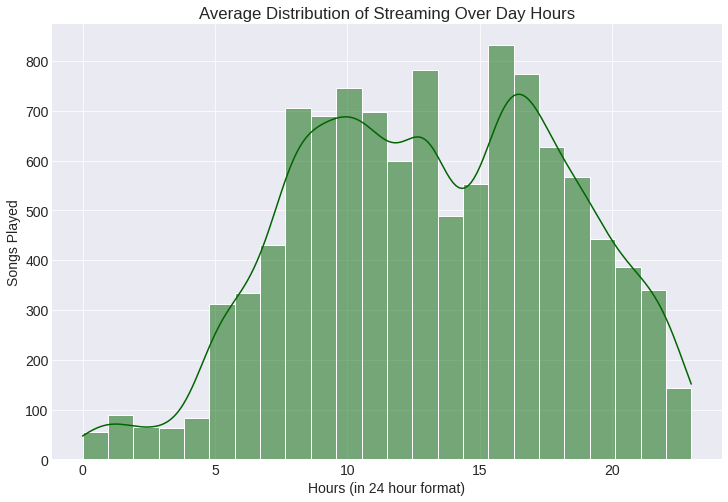

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(spotify_stream_df["hours"], bins=24,kde=True, color="darkgreen");

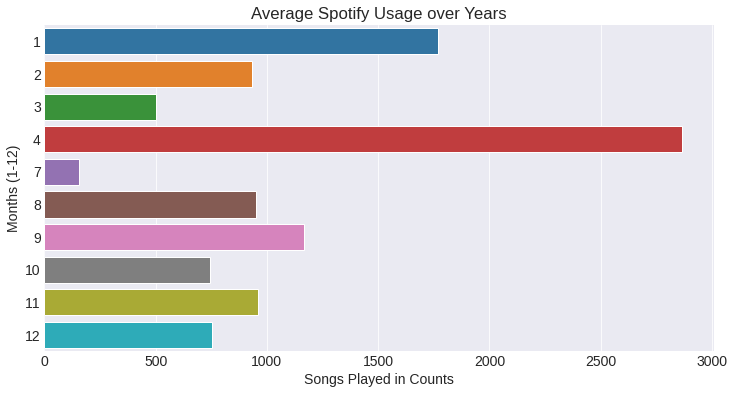

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=spotify_stream_df["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

Q1A: How many hours did I spent on Spotify Streaming since the day I signed up for it?

In [ ]:
time_spent_hours = spotify_stream_df["Listening Time(Hours)"].sum() # Summation of all 
time_spent_hours

369.04200000000003

Q1B: What is actual usage in percentage compared to to the total possible?

In [ ]:
date_df = spotify_stream_df["Play-Time"] # Making a new dataset of time only

In [ ]:
time_difference = (date_df.iloc[10803] - date_df.iloc[0]) / np.timedelta64(1,"D") # Calulating total possible days in days
time_difference_hours = time_difference*24 # Converting that in hours by multiplying with 24
time_difference_hours

6688.449999999999

In [ ]:
time_spent_percentage = time_spent_hours/time_difference_hours*100
time_spent_percentage

5.517601237954983

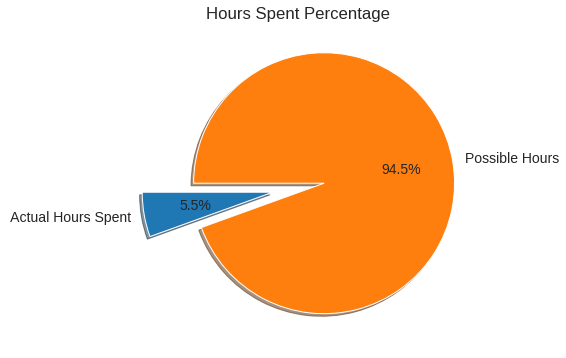

In [ ]:
hours_spent_list = np.array([time_spent_hours, time_difference_hours-time_spent_hours])
hours_spent_list_labels = [" Actual Hours Spent", "Possible Hours"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(hours_spent_list, labels= hours_spent_list_labels, autopct='%1.1f%%',  explode=[0.2,0.2], startangle=180, shadow = True);
plt.title("Hours Spent Percentage");

Q1C: What is the average numbers of songs I played daily ?

In [ ]:
total_songs = spotify_stream_df["trackName"].count() # Total Songs played

In [ ]:
time_difference # Total days when I used Spotify

278.68541666666664

In [ ]:
average_songs_played_daily = (total_songs / time_difference).round()
average_songs_played_daily

39.0

Q1D: On which day I played maximum number of songs ? Plot a scatter plot to show all the dates

In [ ]:
spotify_stream_df["date"] = spotify_stream_df["Play-Time"].dt.date # Creating a new column with date

In [ ]:
most_songs = spotify_stream_df.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)

,Count
date,
2021-04-21,390


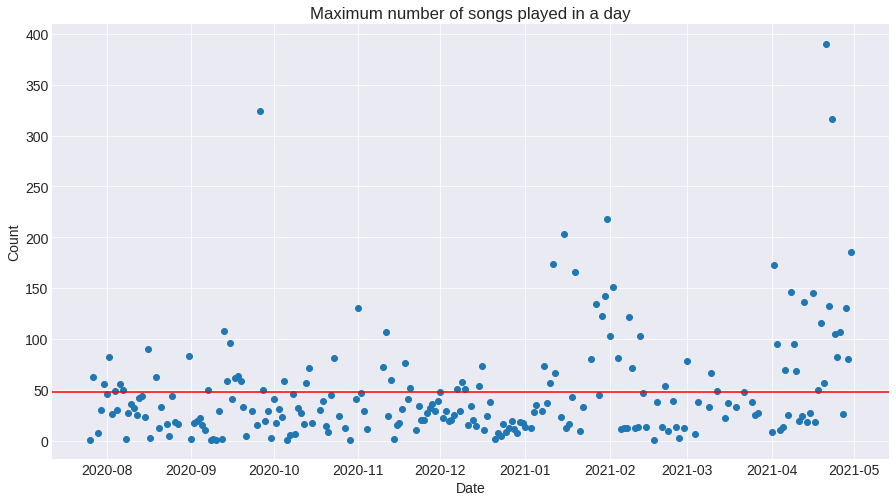

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

Q2A: Who are my favourite 100 Artist ? Make a word cloud to show them.

In [ ]:
fav_artist = spotify_stream_df.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

artistName
Lauv              329
Billie Eilish     219
Jome              178
Pritam            178
Troye Sivan       152
                 ... 
Salman Elahi       21
Atif Aslam         21
ODESZA             20
Bazzi              20
Gurnam Bhullar     20
Name: Count, Length: 100, dtype: int64

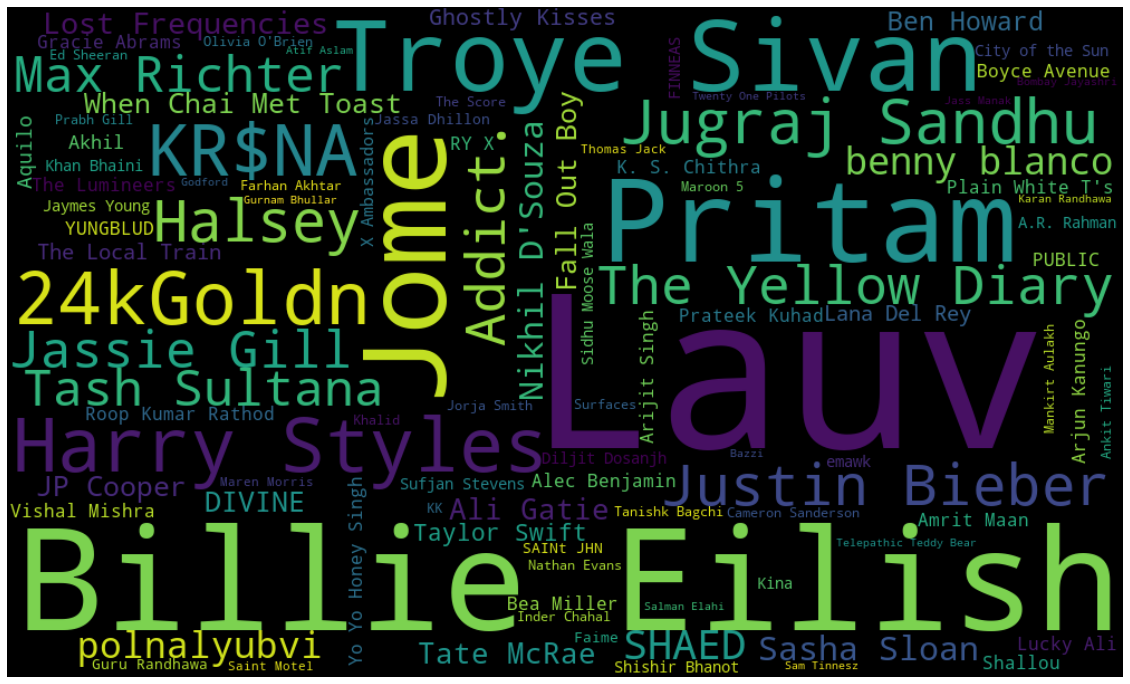

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

In [ ]:
my_fav_artist_playlist = spotify_stream_df.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)

In [ ]:
my_fav_artist_playlist

,,Count
artistName,trackName,
Billie Eilish,bitches broken hearts,171
Lauv,Love Somebody,161
Troye Sivan,BITE,146
24kGoldn,Mood (feat. iann dior),145
Jome,Cinnamon,136
...,...,...
Zayde Wølf,Back at It,14
Mohammed Rafi,Sar Jo Tera Chakraye,14
Akhil,"Duniyaa (From ""Luka Chuppi"")",14


Q3: What are My Favourite 100 Songs ? Make a word cloud to show them.

In [ ]:
fav_songs = spotify_stream_df.groupby(["trackName"])["Count"].count()

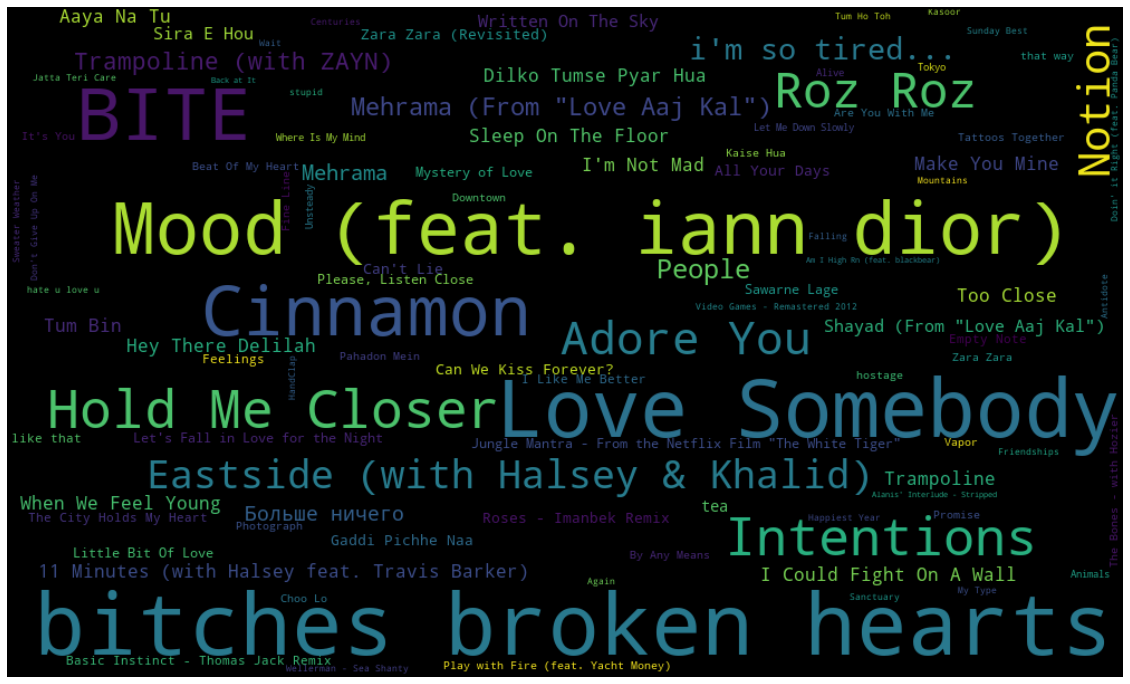

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

Q4: Most Usage ( Active usage in a day over a week) ? Show that with a heatmap.

In [ ]:
active_usage = spotify_stream_df.groupby(['hours', 'day-name'])['artistName'].size().reset_index()
active_usage_pivot = active_usage.pivot("hours", 'day-name', 'artistName')
active_usage_pivot.head()

day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,5.0,1.0,NaN,NaN,30.0,1.0,17.0
1,2.0,13.0,2.0,23.0,19.0,NaN,30.0
2,5.0,NaN,NaN,1.0,31.0,NaN,27.0
3,NaN,NaN,1.0,1.0,1.0,50.0,9.0
4,12.0,NaN,9.0,13.0,6.0,29.0,13.0


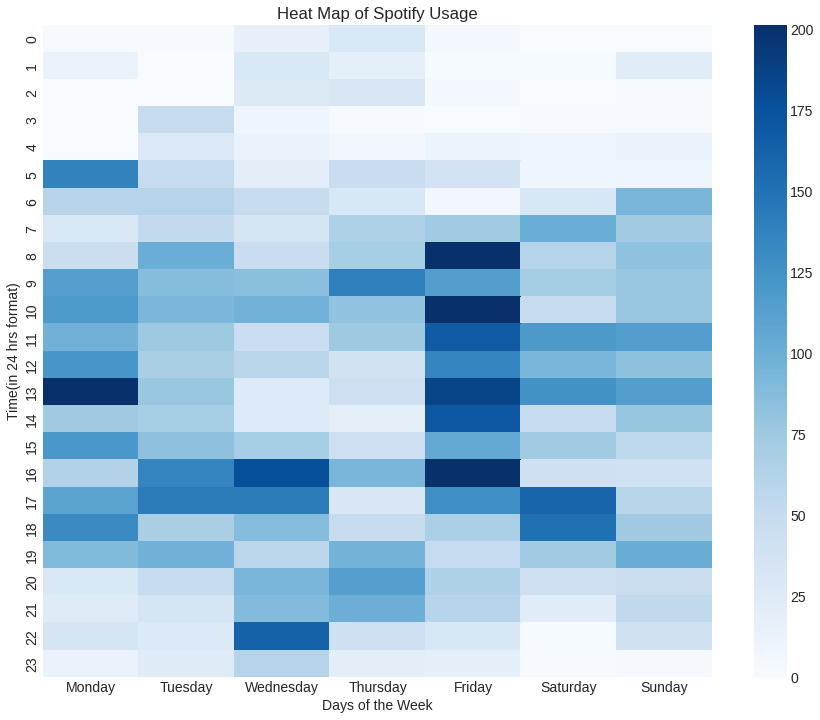

In [ ]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax);
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");

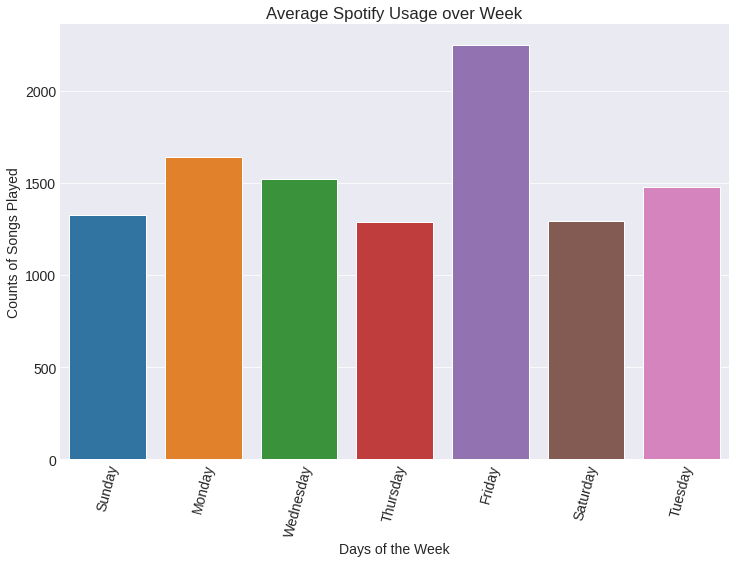

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=spotify_stream_df["day-name"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

Q5A: How my usgae varies over a week? Make a countplot to show.

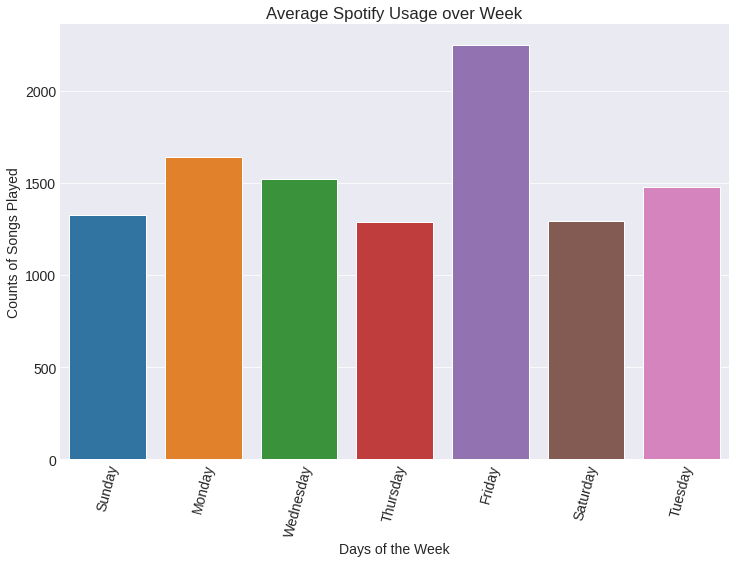

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=spotify_stream_df["day-name"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

Q5B: What is the percentage of usage distribution between Weekday and Weekend ?

In [ ]:
extra_df = spotify_stream_df.copy()
extra_df['is_weekend'] = extra_df["day-name"].isin(['Sunday','Saturday'])
weekday_vs_weekend = extra_df.groupby(['is_weekend'])[['Count']].sum()
weekday_vs_weekend

,Count
is_weekend,
False,8187
True,2617


In [ ]:
weekday_vs_weekend["Percentage"] = weekday_vs_weekend["Count"]/weekday_vs_weekend["Count"].sum()*100
weekday_vs_weekend

,Count,Percentage
is_weekend,,
False,8187,75.77749
True,2617,24.22251


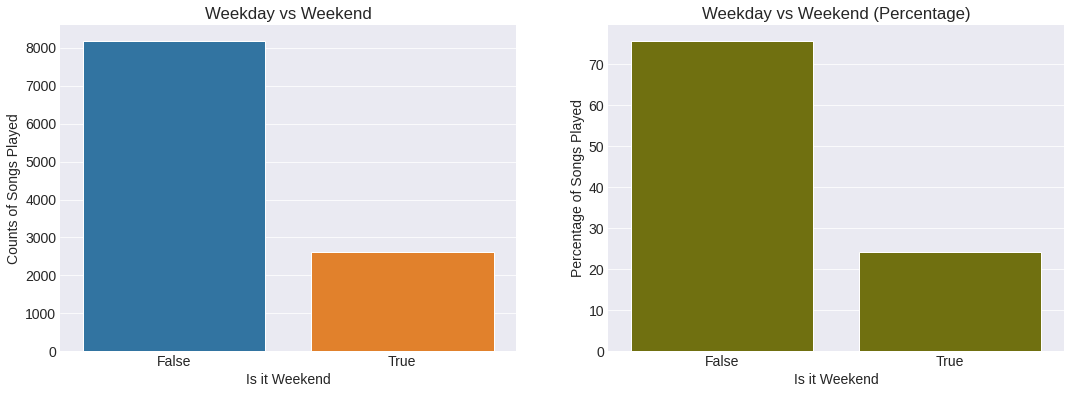

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1 = sns.barplot(x=["False","True"],y="Count",data=weekday_vs_weekend,ax=ax1)
ax1.set(title="Weekday vs Weekend",xlabel="Is it Weekend",ylabel="Counts of Songs Played");

ax2 = sns.barplot(x=["False","True"],y="Percentage",data=weekday_vs_weekend,color="Olive",ax=ax2)
ax2.set(title="Weekday vs Weekend (Percentage)",xlabel="Is it Weekend",ylabel="Percentage of Songs Played");

# **Thank You!**